--------------------------------------------------------------------------------- Heart_Disease_prediction --------------------------------------------------------------------------------------------  

Import the Required Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.neighbors import KNeighborsClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Reading dataset

In [2]:
df = pd.read_csv('heart.csv')
df.head(10)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,Absence
6,56,1,3,130,256,1,2,142,1,0.6,2,1,6,Presence
7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,Presence
8,60,1,4,140,293,0,2,170,0,1.2,2,2,7,Presence
9,63,0,4,150,407,0,2,154,0,4.0,2,3,7,Presence


In [3]:
df.shape

(270, 14)

In [4]:
df.dropna(axis = 0, inplace = True) 
print(df.shape)

(270, 14)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [6]:
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [7]:
df.describe().T.style.background_gradient(cmap = 'Reds')

,count,mean,std,min,25%,50%,75%,max
Age,270.000000,54.433333,9.109067,29.000000,48.000000,55.000000,61.000000,77.000000
Sex,270.000000,0.677778,0.468195,0.000000,0.000000,1.000000,1.000000,1.000000
Chest pain type,270.000000,3.174074,0.950090,1.000000,3.000000,3.000000,4.000000,4.000000
BP,270.000000,131.344444,17.861608,94.000000,120.000000,130.000000,140.000000,200.000000
Cholesterol,270.000000,249.659259,51.686237,126.000000,213.000000,245.000000,280.000000,564.000000
FBS over 120,270.000000,0.148148,0.355906,0.000000,0.000000,0.000000,0.000000,1.000000
EKG results,270.000000,1.022222,0.997891,0.000000,0.000000,2.000000,2.000000,2.000000
Max HR,270.000000,149.677778,23.165717,71.000000,133.000000,153.500000,166.000000,202.000000
Exercise angina,270.000000,0.329630,0.470952,0.000000,0.000000,0.000000,1.000000,1.000000
ST depression,270.000000,1.050000,1.145210,0.000000,0.000000,0.800000,1.600000,6.200000


Data preprocessing


In [8]:
df.isna().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [9]:
# Importing LabelEncoder from Sklearn
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(df['Heart Disease'])
 
# printing label
label

array([1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1])

In [10]:
# removing the column 'Heart Disease' from dataset
# as it is of no use now.
df.drop("Heart Disease", axis=1, inplace=True)
 
# Appending the array to our dataFrame
# with column name 'Heart Disease'
df["Heart Disease"] = label

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    int32  
dtypes: float64(1), int32(1), i

Data visualization

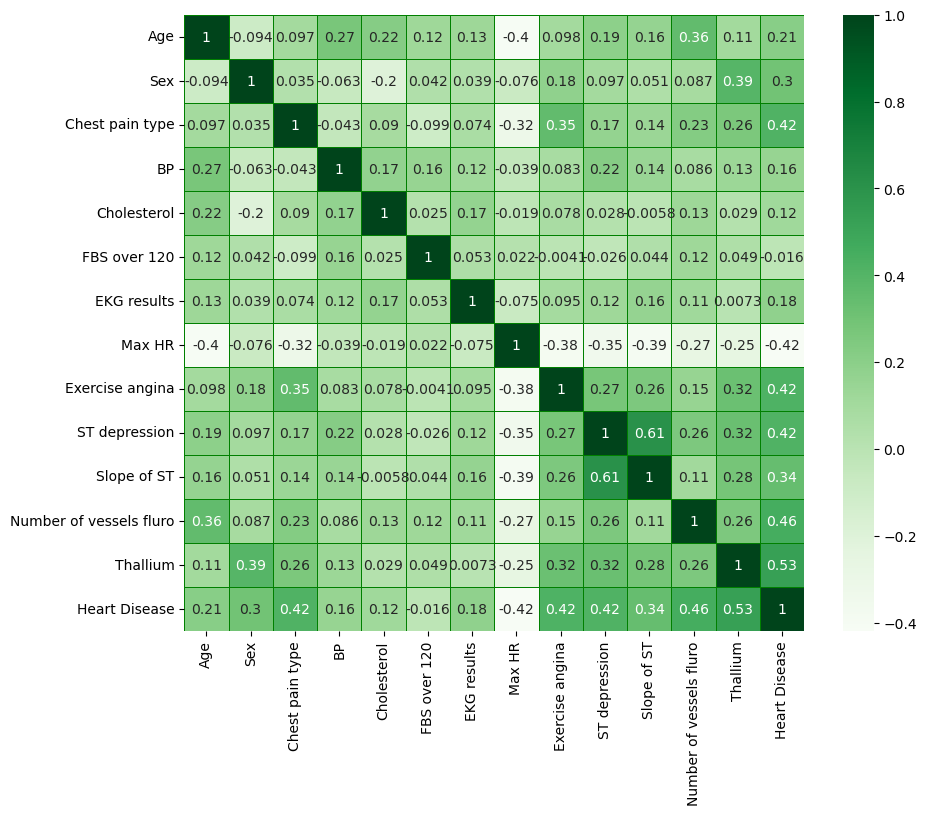

In [12]:
plt.figure(figsize = (10, 8)) 
sns.heatmap(df.corr(), cmap='Greens',annot=True, linecolor='Green', linewidths=.50)
plt.show()

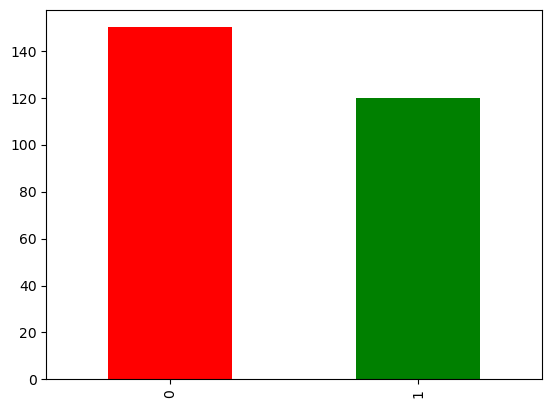

In [13]:
HD = df['Heart Disease']
HD.value_counts().plot(kind='bar',color=['red','green']);

<Axes: xlabel='Heart Disease', ylabel='count'>

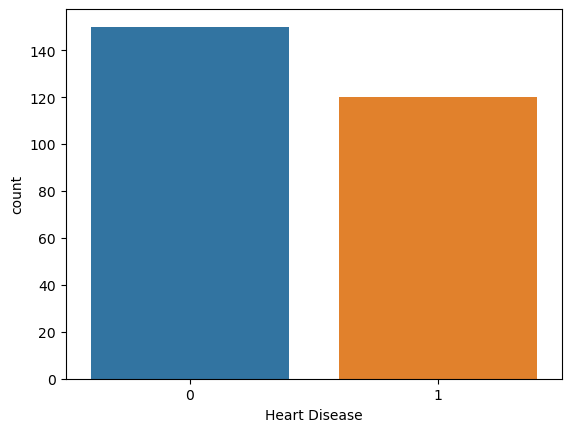

In [14]:
#another way to make the same plot with another colors
sns.countplot(x=df['Heart Disease'])

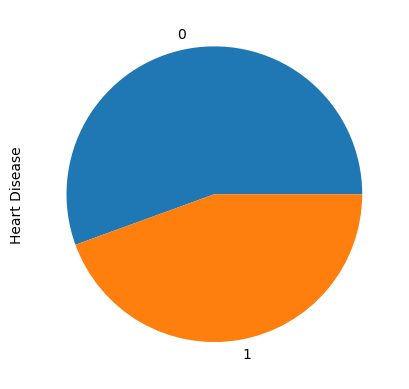

In [15]:
HD.value_counts().plot(kind='pie');

In [16]:
correlation=df.corr()
correlation.T.style.background_gradient(cmap = 'Blues')

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
Age,1.000000,-0.094401,0.096920,0.273053,0.220056,0.123458,0.128171,-0.402215,0.098297,0.194234,0.159774,0.356081,0.106100,0.212322
Sex,-0.094401,1.000000,0.034636,-0.062693,-0.201647,0.042140,0.039253,-0.076101,0.180022,0.097412,0.050545,0.086830,0.391046,0.297721
Chest pain type,0.096920,0.034636,1.000000,-0.043196,0.090465,-0.098537,0.074325,-0.317682,0.353160,0.167244,0.136900,0.225890,0.262659,0.417436
BP,0.273053,-0.062693,-0.043196,1.000000,0.173019,0.155681,0.116157,-0.039136,0.082793,0.222800,0.142472,0.085697,0.132045,0.155383
Cholesterol,0.220056,-0.201647,0.090465,0.173019,1.000000,0.025186,0.167652,-0.018739,0.078243,0.027709,-0.005755,0.126541,0.028836,0.118021
FBS over 120,0.123458,0.042140,-0.098537,0.155681,0.025186,1.000000,0.053499,0.022494,-0.004107,-0.025538,0.044076,0.123774,0.049237,-0.016319
EKG results,0.128171,0.039253,0.074325,0.116157,0.167652,0.053499,1.000000,-0.074628,0.095098,0.120034,0.160614,0.114368,0.007337,0.182091
Max HR,-0.402215,-0.076101,-0.317682,-0.039136,-0.018739,0.022494,-0.074628,1.000000,-0.380719,-0.349045,-0.386847,-0.265333,-0.253397,-0.418514
Exercise angina,0.098297,0.180022,0.353160,0.082793,0.078243,-0.004107,0.095098,-0.380719,1.000000,0.274672,0.255908,0.153347,0.321449,0.419303
ST depression,0.194234,0.097412,0.167244,0.222800,0.027709,-0.025538,0.120034,-0.349045,0.274672,1.000000,0.609712,0.255005,0.324333,0.417967


In [17]:
# splitting the data into X and Y 
X = df.drop(columns = 'Heart Disease', axis = 1)
X.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3


In [18]:
Y = df['Heart Disease']
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Heart Disease, dtype: int32

In [19]:
#Splitting the Data into Training data and Test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, stratify = Y, random_state = 3 )

# stratify will distribute 0 and 1 in even manner, of that prediction will be unbiased
# test_split tells a ratio about size of test data in dataset, means 30 percent of data is test data
# random_state tells about the randomness of data, and number tells about its extent of randomness

# checking shape of splitted data

print(X.shape, X_train.shape, X_test.shape)

(270, 13) (229, 13) (41, 13)


Model Training

In [20]:
model = LogisticRegression()
# training the LogisticRegression model with training data
model.fit(X_train.values, Y_train)

C:\Users\ascom\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation

In [21]:
# accuracy of traning data
# accuracy function measures accuracy between two values,or columns

X_train_prediction = model.predict(X_train.values)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print("The accuracy of training data : ", training_data_accuracy)

The accuracy of training data :  0.8253275109170306


In [22]:
# accuracy of test data

X_test_prediction = model.predict(X_test.values)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print("The accuracy of test data : ", test_data_accuracy)


The accuracy of test data :  0.9512195121951219


Building Prediction system

In [23]:
#Steps :
#take input data
#Process the data, change into array
#reshape data as single element in array
#predict output using predict function
#output the value
#---------------------------------------------
# input feature values
input_data = (42,1,0,136,315,0,1,125,1,1.8,1,0,1)

# change the input data into numpy array 

input_data_as_numpy_array = np.array(input_data)

# reshape the array to predict data for only one instance

reshaped_array = input_data_as_numpy_array.reshape(1,-1)


In [24]:

# predicting the result and printing it

prediction = model.predict(reshaped_array)

print(prediction)

if(prediction[0] == 0):
    print("💔 Patient has a healthy heart 💔")

else: 
    print("💛 Patient has a unhealthy heart 💛")

[0]
💔 Patient has a healthy heart 💔


@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

Thanks

Mahmoud Mohamed Rady,  Machine Learning (AI) student. 9/2023

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@